In [1]:
##
import netCDF4 as nc
import numpy as np
import glob
import numpy.ma as ma

In [2]:
## ploting tool
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap

In [17]:
files = sorted(glob.glob('/data/dadm1/obs/GPM_IMERG/GPM_3IMERGHH.07/2021/213/*.HDF5'))

In [18]:
print(files[10])
re = nc.Dataset(files[10], 'r',  format='NETCDF4_CLASSIC')
print(re)

/data/dadm1/obs/GPM_IMERG/GPM_3IMERGHH.07/2021/213/3B-HHR.MS.MRG.3IMERG.20210801-S050000-E052959.0300.V07B.HDF5
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    FileHeader: DOI=10.5067/GPM/IMERG/3B-HH/07;
DOIauthority=http://dx.doi.org/;
DOIshortName=3IMERGHH;
AlgorithmID=3IMERGHH;
AlgorithmVersion=3IMERGH_7.0;
FileName=3B-HHR.MS.MRG.3IMERG.20210801-S050000-E052959.0300.V07B.HDF5;
SatelliteName=MULTI;
InstrumentName=MERGED;
GenerationDateTime=2024-01-05T12:26:34.000Z;
StartGranuleDateTime=2021-08-01T05:00:00.000Z;
StopGranuleDateTime=2021-08-01T05:29:59.999Z;
GranuleNumber=;
NumberOfSwaths=0;
NumberOfGrids=1;
GranuleStart=;
TimeInterval=HALF_HOUR;
ProcessingSystem=PPS;
ProductVersion=V07B;
EmptyGranule=NOT_EMPTY;
MissingData=;

    FileInfo: DataFormatVersion=7e;
TKCodeBuildVersion=0;
MetadataVersion=7e;
FormatPackage=HDF5-1.10.5;
BlueprintFilename=GPM.V7.3IMERGHH.blueprint.xml;
BlueprintVersion=BV_69;
TKIOVersion=3.100;
MetadataStyle=PVL;
EndianType=LIT

In [19]:
test = re.variables
print(test)

{}


In [20]:
grid = re.groups['Grid']
print(grid)

<class 'netCDF4.Group'>
group /Grid:
    GridHeader: BinMethod=ARITHMETIC_MEAN;
Registration=CENTER;
LatitudeResolution=0.1;
LongitudeResolution=0.1;
NorthBoundingCoordinate=90;
SouthBoundingCoordinate=-90;
EastBoundingCoordinate=180;
WestBoundingCoordinate=-180;
Origin=SOUTHWEST;

    dimensions(sizes): nv(2), lonv(2), latv(2), time(1), lon(3600), lat(1800)
    variables(dimensions): int32 time(time), float32 lon(lon), float32 lat(lat), int32 time_bnds(time, nv), float32 lon_bnds(lon, lonv), float32 lat_bnds(lat, latv), float32 precipitation(time, lon, lat), float32 randomError(time, lon, lat), int16 probabilityLiquidPrecipitation(time, lon, lat), float32 precipitationQualityIndex(time, lon, lat)
    groups: Intermediate


In [21]:
prec = np.array(grid.variables['precipitation'])

In [22]:
intermediate = grid.groups['Intermediate']
irprec = np.array(intermediate.variables['IRprecipitation'])

In [23]:
gpm_lon = np.arange(5,35996,10)/100
gpm_lat = np.arange(-8995,8996,10)/100
print(gpm_lat.shape)

(1800,)


In [24]:
print(prec.shape)
pp = np.zeros((3600,1800))
pp[0:1800,:] = prec[0,1800:3600,:]
pp[1800:3600,:] = prec[0,0:1800,:]
tpp = pp.T
print(tpp.shape)

(1, 3600, 1800)
(1800, 3600)


In [43]:
print(gpm_lat[975],gpm_lat[1400])
print(gpm_lon[1000],gpm_lon[1600])

7.55 50.05
100.05 160.05


In [44]:
cmap1 = mpl.cm.Blues(np.linspace(0,1,10))
#self_cmap = np.vstack(cmap1)
#cmap_bt = mpl.colors.ListedColormap(cmap1)
self_cmap = np.vstack((cmap1[2],cmap1[4],cmap1[6]))
colors = [ (0.79,0.79,0.79,0.) ]
#self_cmap = np.vstack((cmap1[0],cmap1[2],cmap1[5],cmap1[8],cmap2[13],cmap1[15],cmap1[17],cmap1[19],cmap1[21]))
cmap = mpl.colors.ListedColormap(self_cmap)
cmap.set_extremes(over=cmap1[8])

cmap.set_extremes(under=colors[0])

In [45]:
xi, yi = np.meshgrid(gpm_lon[1000:1600],gpm_lat[975:1400])

Text(163, 7.8, 'Pr [mm/hr]')

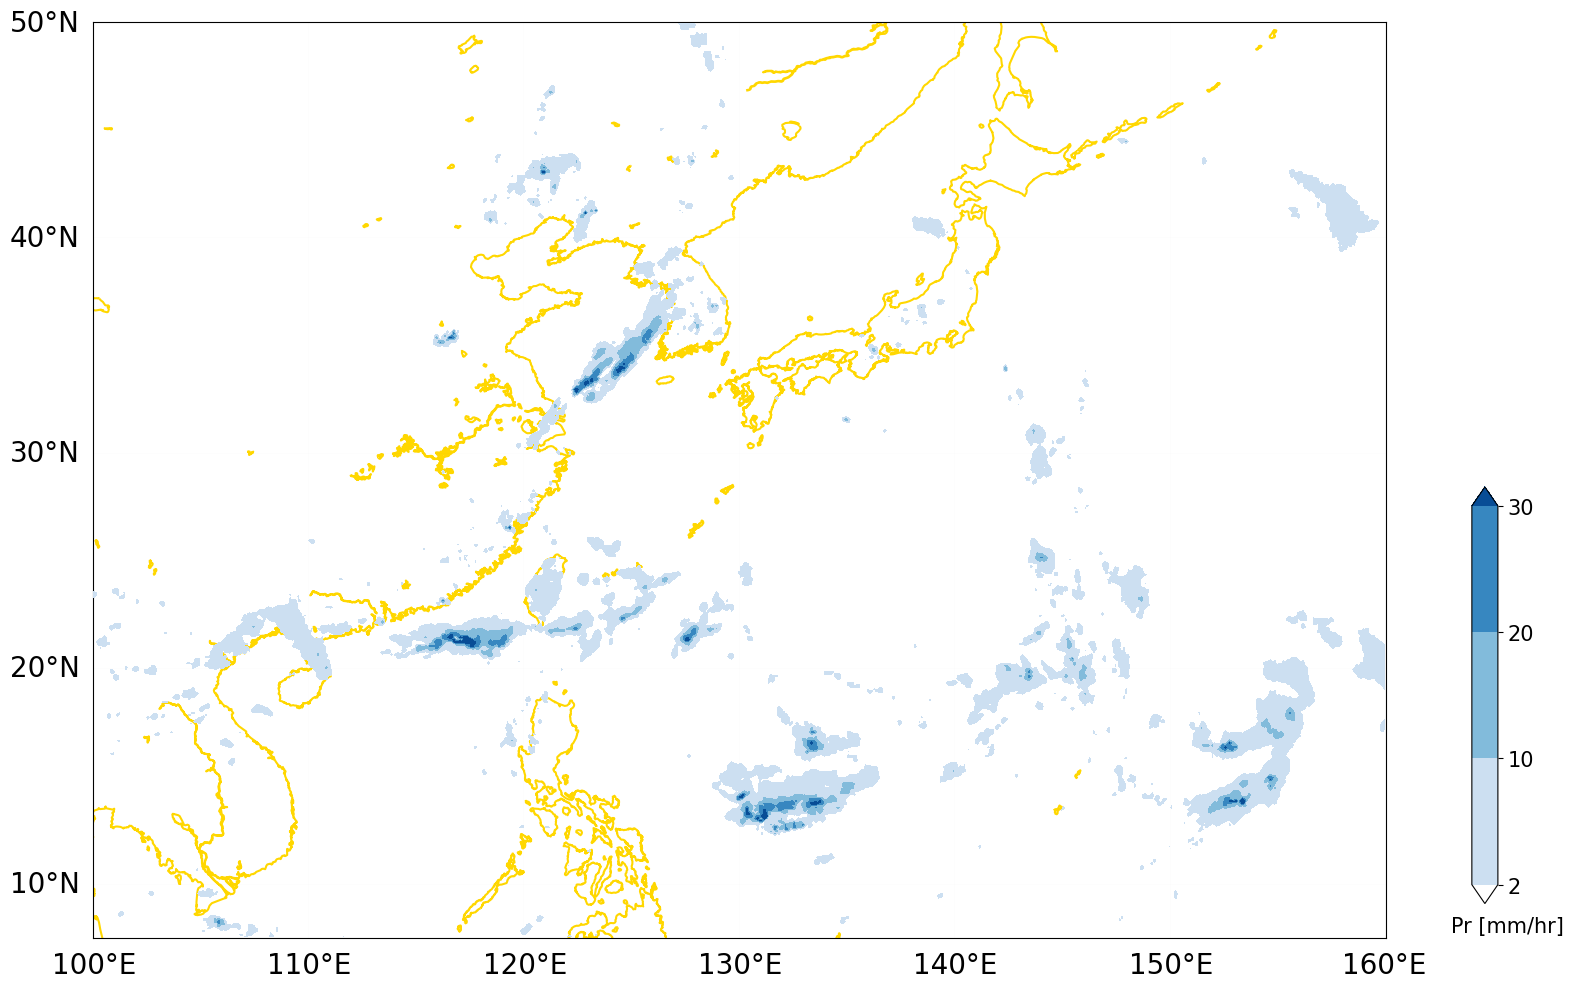

In [47]:
fig,ax1 = plt.subplots(1,1,figsize=(27,10),tight_layout=True)
m = Basemap(llcrnrlon=100, urcrnrlon=160, llcrnrlat=7.5, urcrnrlat=50,resolution='i')
m.drawcoastlines(linewidth=1.5,color='gold')
m.drawparallels(np.arange(-10., 61., 10), labels=[1, 0, 0, 0], linewidth=0.01, color='k', fontsize=20)
m.drawmeridians(np.arange(100., 181., 10), labels=[0, 0, 0, 1], linewidth=0.01, color='k', fontsize=20)

masked_pp = ma.masked_where(tpp < 0, tpp)
pr = m.contourf(xi,yi,masked_pp[975:1400,1000:1600],vmin=2,vmax=30,cmap=cmap,levels=[2,10,20,30],extend='both',zorder=3)
c_pr = plt.colorbar(pr,extend='both',orientation='vertical',pad=0.033,fraction=0.010,aspect=16,anchor=(0.0,0.026))
c_pr.ax.tick_params(labelsize=15)
plt.text(163,7.7,'Pr [mm/hr]',fontsize=15)